In [24]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [25]:
# Load csv file
comments_data = pd.read_csv('data/preprocessed.csv')

# Dataframe
df_comments = pd.DataFrame(comments_data) 

In [26]:
# Dataframes for different platforms
df_fb = df_comments[df_comments['platform'] == 'Facebook']
df_yt = df_comments[df_comments['platform'] == 'Youtube']
df_red = df_comments[df_comments['platform'] == 'Reddit']
df_tik = df_comments[df_comments['platform'] == 'Tiktok']

## Understanding the dataset

In [27]:
# check data samples 
df_comments.head(3)

,platform,raw,preprocessed,length
0,Facebook,Why nowadays every thing seem to be increasin...,"['nowadays', 'every', 'thing', 'seem', 'increa...",17
1,Facebook,I will have to disagree.. we’re not that high!!,"['disagree', 'high']",2
2,Facebook,"Wag po tayong mag-alala. Naniniwala po ako, is...","['wag', 'tayong', 'magalala', 'naniniwala', 'i...",16


In [28]:
# check duplicates
print("Duplicates: ", df_comments.duplicated().sum())

Duplicates:  0


In [29]:
# check missing values
df_comments.isnull().sum()

platform        0
raw             0
preprocessed    0
length          0
dtype: int64

In [30]:
# check the data type of each column
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4725 entries, 0 to 4724
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   platform      4725 non-null   object
 1   raw           4725 non-null   object
 2   preprocessed  4725 non-null   object
 3   length        4725 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 147.8+ KB


In [31]:
# check unique platforms
df_comments['platform'].unique()

array(['Facebook', 'Reddit', 'Tiktok', 'Youtube'], dtype=object)

## Visualization

In [32]:
# Generate bar graph
from collections import Counter
import seaborn as sns

def draw_bar_graph_for_text_visualization(df, platform, count):
    comments_word_list = get_words_from_col(df)
    
    comment_count = Counter(comments_word_list)
    top_words = pd.DataFrame(comment_count.most_common(count), columns=['word', 'Counter'])

    # add percentage column
    sum_count = top_words['Counter'].sum()
    count_percentages = []
    for num in top_words['Counter']:
        percent = round((num/sum_count)*100)
        count_percentages.append(percent)
    top_words.insert(2, "Percent (%)", count_percentages, True)

    # show bar plot
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.barplot( x='Counter', y='word', data=top_words, ax=ax)
    plt.title("Top "+ str(count) +" Most Prevalant Words on {}".format(platform))
    plt.xticks(rotation='horizontal')
    for i in ax.containers:
        ax.bar_label(i,)

def get_words_from_col(df):
    comments = df['preprocessed']

    comments_word_list = []
    comments= comments.apply(eval)
    for sublist in comments:
        for word in sublist:
            comments_word_list.append(word)
    
    return comments_word_list

In [33]:
# Generate word cloud
from wordcloud import WordCloud, STOPWORDS
def draw_word_cloud(df, title, count):
    comments_list = df['preprocessed'].apply(eval)
    word_cloud = WordCloud(
                    background_color='white',
                    max_words=count,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(comments_list))
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    fig.suptitle("Word Cloud of top " + str(count) +" words in " + title +" Comments", fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(word_cloud)
    plt.show()

In [34]:
# Generate histogram
def generate_histogram(df, platform):
    plt.hist(df['length'])
    plt.title("Number of words in each comments in " + platform)
    plt.xlabel('Number of words')
    plt.ylabel('Number of comments')
    plt.figure(figsize=(15, 8))

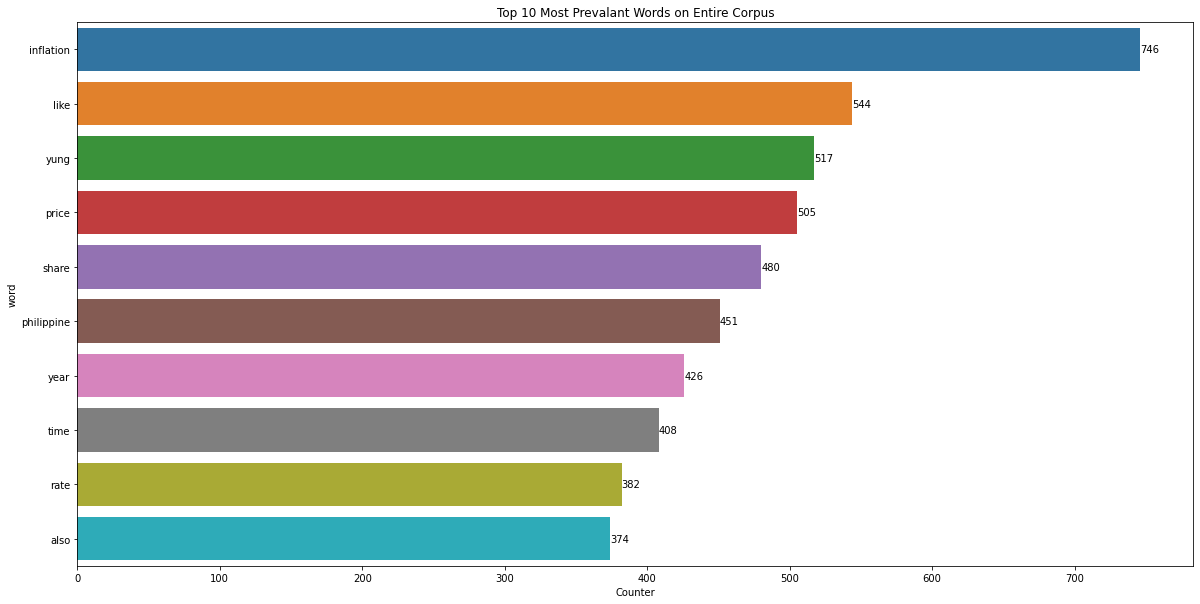

In [35]:
# Top most prevalent words in the entire corpus
draw_bar_graph_for_text_visualization(df_comments, 'Entire Corpus', 10)

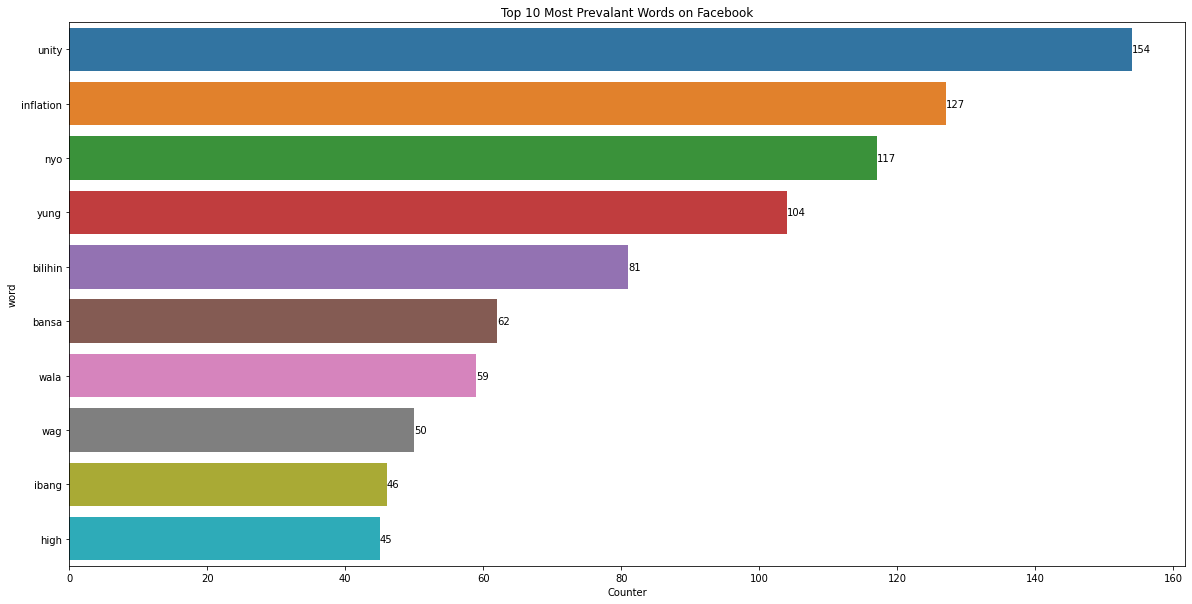

In [36]:
# Top most prevalent words in Facebook
draw_bar_graph_for_text_visualization(df_fb, 'Facebook', 10)

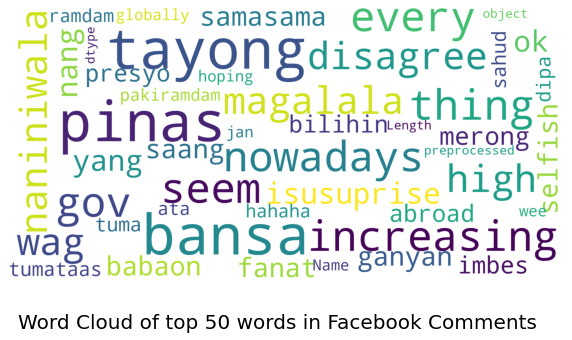

In [37]:
# WordCloud for Facebook comments
draw_word_cloud(df_fb, 'Facebook', 50)

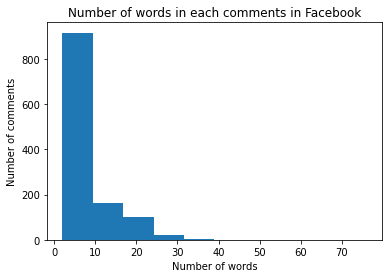

<Figure size 1080x576 with 0 Axes>

In [38]:
# Visualize the length of words in each Facebook coomments
generate_histogram(df_fb, 'Facebook')

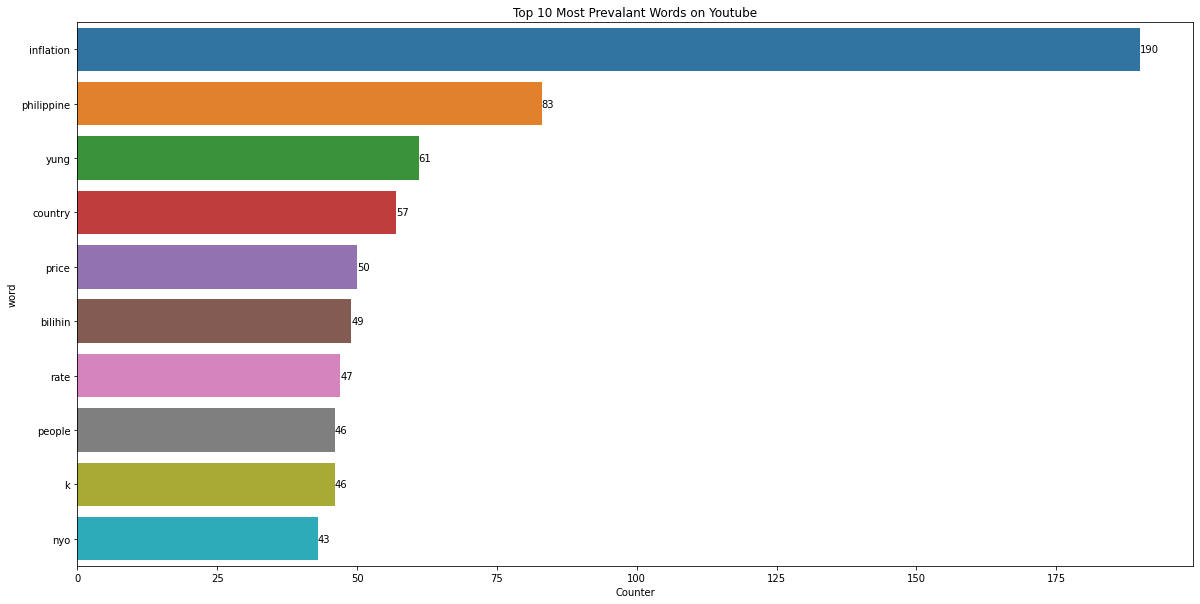

In [39]:
# Top 10 most prevalent words in Youtube
draw_bar_graph_for_text_visualization(df_yt, 'Youtube', 10)

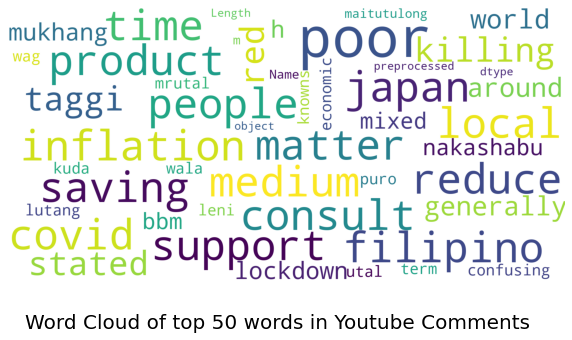

In [40]:
# WordCloud for Youtube comments
draw_word_cloud(df_yt, 'Youtube', 50)

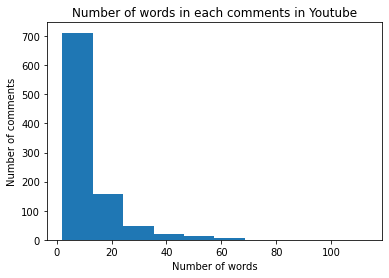

<Figure size 1080x576 with 0 Axes>

In [41]:
# Visualize the length of words in each comment
generate_histogram(df_yt, 'Youtube')

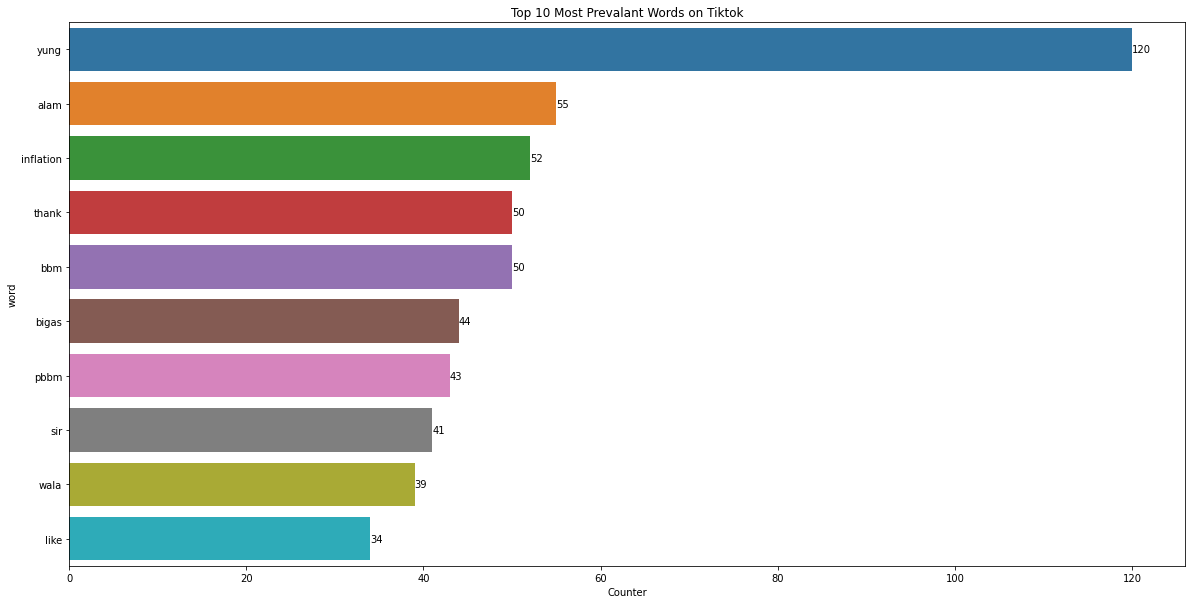

In [42]:
# Top 10 most prevalent words in Tiktok
draw_bar_graph_for_text_visualization(df_tik, 'Tiktok', 10)

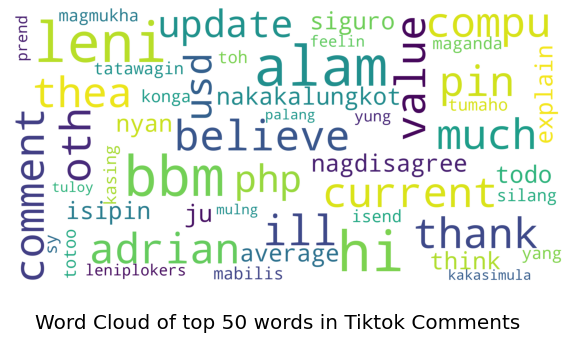

In [43]:
# WordCloud for Tiktok comments
draw_word_cloud(df_tik, 'Tiktok', 50)

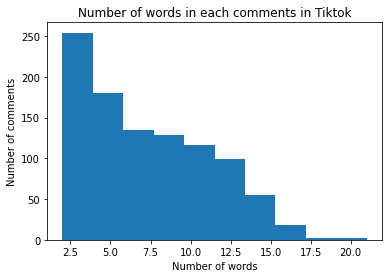

<Figure size 1080x576 with 0 Axes>

In [44]:
# Visualize the length of words in each comment
generate_histogram(df_tik, 'Tiktok')

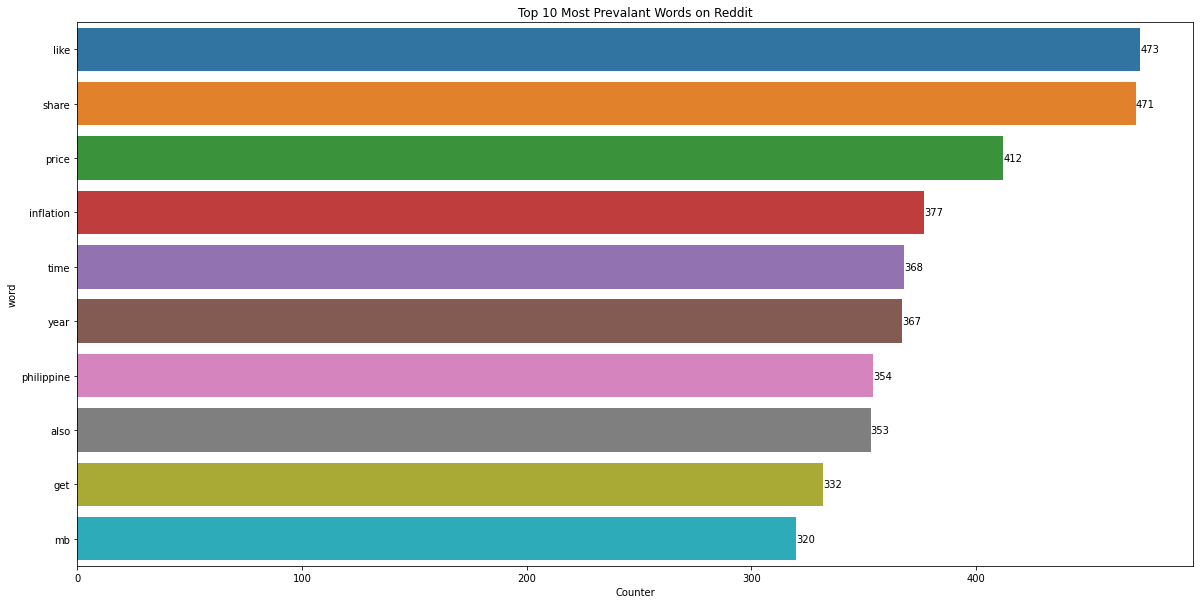

In [45]:
# Top 10 most prevalent words in Reddit
draw_bar_graph_for_text_visualization(df_red, 'Reddit', 10)

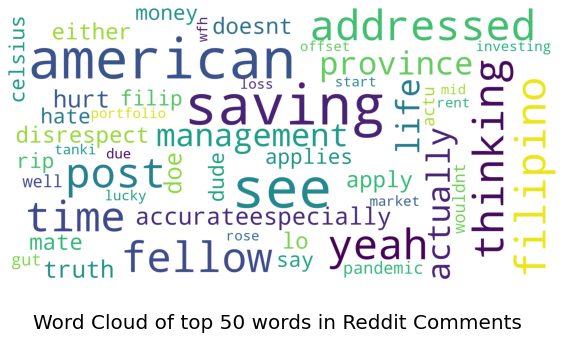

In [46]:
# WordCloud for Reddit comments
draw_word_cloud(df_red, 'Reddit', 50)

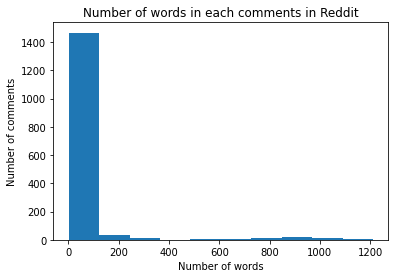

<Figure size 1080x576 with 0 Axes>

In [47]:
# Visualize the length of words in each comment
generate_histogram(df_red, 'Reddit')